Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from numpy import pi

# Signál v čase

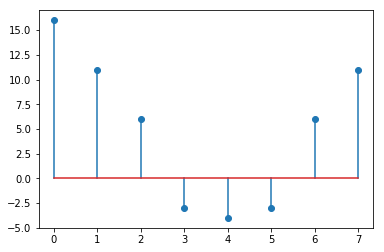

In [2]:
x = [16,11,6,-3,-4,-3,6,11]
N = len(x)
plt.stem(x)
plt.show()

# Báze

Abychom spočítali koeficienty spektra, promítáme signál do bází, které tvoří cosinusovky na frekvencích $\frac{0}{8}, \frac{1}{8}, \dots, \frac{7}{8}$.

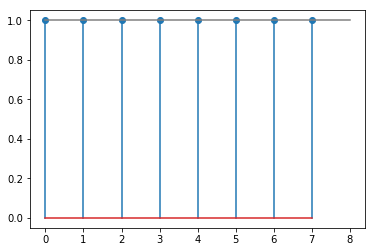

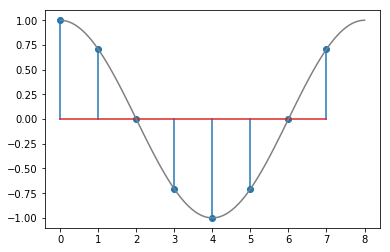

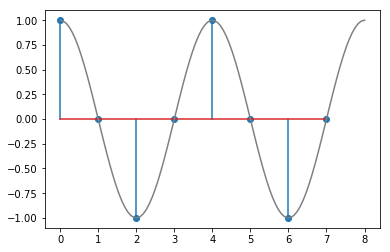

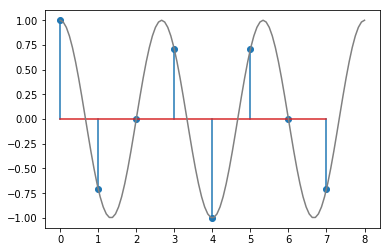

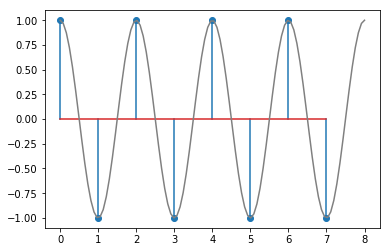

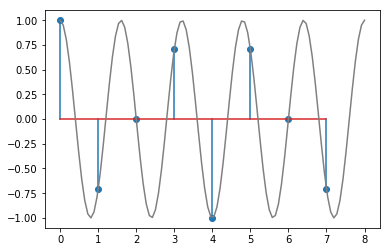

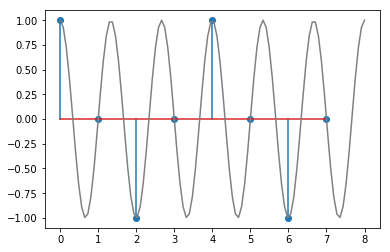

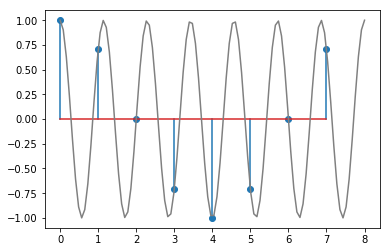

In [3]:
n_axis = np.arange(8)
x_axis = np.linspace(0,8,100)
for k in range(8):
    cos_n = np.cos(2*pi*k/8*n_axis)
    cos_x = np.cos(2*pi*k/8*x_axis)
    plt.figure()
    plt.stem(cos_n)
    plt.plot(x_axis,cos_x,color='0.5')
plt.show()

## Promítnutí do báze 0

Počítáme koeficient spektra $X[0]$.

In [4]:
cos_n = np.cos(2*pi*0/8*n_axis)
cos_n

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [5]:
np.sum(x * cos_n) / 8

5.0

## Promítnutí do báze 1

Počítáme koeficient spektra $X[1]$.

In [6]:
cos_n = np.cos(2*pi*1/8*n_axis)
cos_n

array([  1.00000000e+00,   7.07106781e-01,   6.12323400e-17,
        -7.07106781e-01,  -1.00000000e+00,  -7.07106781e-01,
        -1.83697020e-16,   7.07106781e-01])

In [7]:
np.sum(x * cos_n) / 8

4.9748737341529159

## Promítnutí do báze 2

Počítáme koeficient spektra $X[2]$.

In [8]:
cos_n = np.cos(2*pi*2/8*n_axis)
cos_n

array([  1.00000000e+00,   6.12323400e-17,  -1.00000000e+00,
        -1.83697020e-16,   1.00000000e+00,   3.06161700e-16,
        -1.00000000e+00,  -4.28626380e-16])

In [9]:
np.sum(x * cos_n) / 8

-6.6613381477509392e-16

## Obdobně pro další báze...

In [10]:
X = np.zeros(N)
n_axis = np.arange(N)
for k in range(N):
    X[k] = np.sum(x * np.cos(2*pi*k/N*n_axis)) / N

# Vypočítáné spektrum

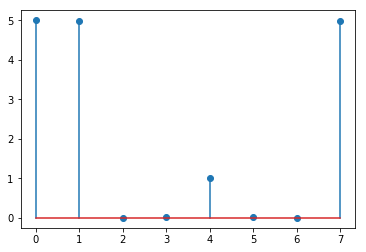

array([  5.00000000e+00,   4.97487373e+00,  -6.66133815e-16,
         2.51262658e-02,   1.00000000e+00,   2.51262658e-02,
         0.00000000e+00,   4.97487373e+00])

In [11]:
plt.stem(np.abs(X))
plt.show()
X

Ze spektra můžeme zpět dostat původní signál sumou cosinusovek na frekvencích $\frac{0}{8}, \frac{1}{8}, \dots, \frac{7}{8}$

\begin{align}
x[n] &= \sum_{k=0}^7 X[k] \cos(2\pi \frac{k}{N} n) = \\
&= X[0] cos(2\pi \frac{0}{8} n) + X[1] cos(2\pi \frac{1}{8} n) + \dots + X[7] cos(2\pi \frac{7}{8} n)
\end{align}

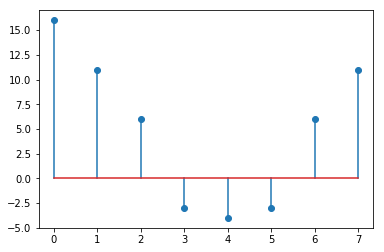

array([ 16.,  11.,   6.,  -3.,  -4.,  -3.,   6.,  11.])

In [12]:
summed = np.zeros(N)
n = np.arange(N)
for k in range(N):
    summed += X[k].real * np.cos(2*np.pi*k/N*n)
plt.stem(summed)
plt.show()
summed